## Support Vector Machine

Key objective of SVM is to draw a hyperplane which separates the two classes optimally such that the margin is maximum between the hyperplane and the observations. Figure x below illustrates that there is possibility of different hyperplane, however the objective of SVM is to find the one which gives us high margin. 

To maximize the margin we need to minimize (1/2)||w||2 subject to yi(WTXi + b)-1 ≥ 0 for all i.
Final SVM equation can be written mathematically as 
L = ∑_i▒di -  1/2 ∑_ij▒α_i  α_i y_i y_j (X ̅iX ̅j)

### Key parameters

* C: This is the penalty parameter and helps in fitting the boundaries smoothly and appropriately, default=1
* Kernel: It must be one of rbf/linear/poly/sigmoid/precomputed, default=’rbf’(Radial Basis Function). Choosing appropriate kernel will result in better model fit.

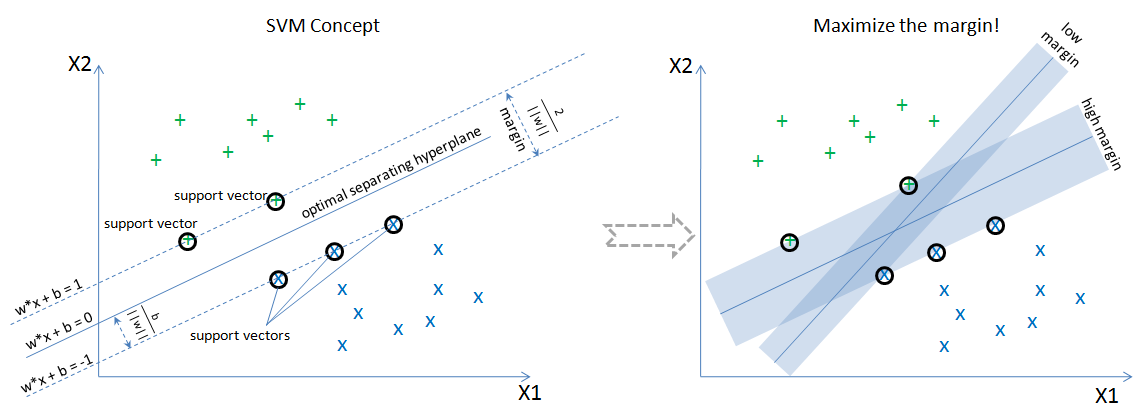

In [1]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/SVM.png', width=800)

### Multivariate and Multi-class Decision Tree

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
# X = iris.data
y = iris.target

print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


Normalize data: the unit of measurement might differ so lets normalize the data before building the model

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

Split data into train and test. When ever we are using radom function its advised to use a seed to ensure the reproducibility of the results.

In [4]:
# split data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

# generate evaluation metrics
print "Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train))
print "Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train))
print "Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train))

print "Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test))
print "Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test))
print "Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test))

Train - Accuracy : 0.952380952381
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105

Test - Accuracy : 0.977777777778
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :              precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Plot Decision Boundary 

Let's consider a two class example to keep things simple

In [7]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0) 

# build a simple logistic regression model
clf = SVC(kernel='linear', random_state=0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

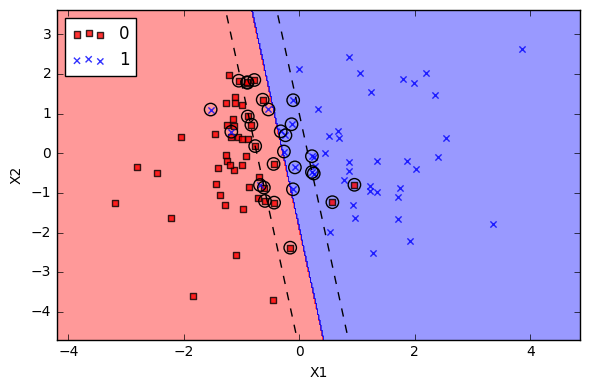

In [8]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()